## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  64.818786   925.935729  0.192335  7.580470  1.174647
1  34.570765  1000.455236  0.220168  1.088136  1.393780
2  10.273039   990.364180  0.160583  4.003014  1.661129
3  68.396576   177.885089  0.865180  8.833952  1.026149
4  17.660743  1496.652473  0.787790  9.527262  1.692561


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.13714 | train_mse: 3.02836 | train_mae: 1.23377 |  0:00:00s
epoch 1  | loss: 0.65758 | train_mse: 2.11926 | train_mae: 1.04899 |  0:00:00s
epoch 2  | loss: 0.48895 | train_mse: 2.54365 | train_mae: 1.19433 |  0:00:00s


epoch 3  | loss: 0.43282 | train_mse: 2.8187  | train_mae: 1.26419 |  0:00:00s
epoch 4  | loss: 0.28652 | train_mse: 1.81234 | train_mae: 0.99093 |  0:00:00s
epoch 5  | loss: 0.2655  | train_mse: 1.93834 | train_mae: 0.99113 |  0:00:00s


epoch 6  | loss: 0.4695  | train_mse: 1.96723 | train_mae: 1.05958 |  0:00:01s
epoch 7  | loss: 0.36109 | train_mse: 1.11361 | train_mae: 0.81773 |  0:00:01s


epoch 8  | loss: 0.3614  | train_mse: 0.68312 | train_mae: 0.63182 |  0:00:01s
epoch 9  | loss: 0.38213 | train_mse: 1.0539  | train_mae: 0.74736 |  0:00:01s


epoch 10 | loss: 0.2282  | train_mse: 2.00265 | train_mae: 0.99117 |  0:00:01s
epoch 11 | loss: 0.33377 | train_mse: 1.87741 | train_mae: 0.97127 |  0:00:02s


epoch 12 | loss: 0.15328 | train_mse: 1.09295 | train_mae: 0.76725 |  0:00:02s
epoch 13 | loss: 0.22241 | train_mse: 0.85671 | train_mae: 0.65833 |  0:00:02s
epoch 14 | loss: 0.23197 | train_mse: 1.03143 | train_mae: 0.67709 |  0:00:02s


epoch 15 | loss: 0.22316 | train_mse: 1.26807 | train_mae: 0.73666 |  0:00:02s
epoch 16 | loss: 0.23746 | train_mse: 1.46301 | train_mae: 0.78065 |  0:00:02s


epoch 17 | loss: 0.26126 | train_mse: 1.58236 | train_mae: 0.833   |  0:00:02s
epoch 18 | loss: 0.26357 | train_mse: 0.91126 | train_mae: 0.6498  |  0:00:02s
epoch 19 | loss: 0.35428 | train_mse: 0.19364 | train_mae: 0.33799 |  0:00:02s


epoch 20 | loss: 0.18324 | train_mse: 0.17275 | train_mae: 0.31811 |  0:00:02s
epoch 21 | loss: 0.14512 | train_mse: 0.4315  | train_mae: 0.44936 |  0:00:03s


epoch 22 | loss: 0.15845 | train_mse: 0.71771 | train_mae: 0.55781 |  0:00:03s
epoch 23 | loss: 0.23382 | train_mse: 1.00838 | train_mae: 0.64081 |  0:00:03s
epoch 24 | loss: 0.1593  | train_mse: 0.55205 | train_mae: 0.50476 |  0:00:03s


epoch 25 | loss: 0.15171 | train_mse: 0.26196 | train_mae: 0.37817 |  0:00:03s
epoch 26 | loss: 0.21813 | train_mse: 0.11864 | train_mae: 0.28704 |  0:00:03s
epoch 27 | loss: 0.15045 | train_mse: 0.11336 | train_mae: 0.27602 |  0:00:03s


epoch 28 | loss: 0.20968 | train_mse: 0.21819 | train_mae: 0.33475 |  0:00:03s
epoch 29 | loss: 0.32497 | train_mse: 0.20275 | train_mae: 0.318   |  0:00:03s
epoch 30 | loss: 0.10702 | train_mse: 0.18624 | train_mae: 0.31277 |  0:00:03s


epoch 31 | loss: 0.26791 | train_mse: 0.2074  | train_mae: 0.32588 |  0:00:03s
epoch 32 | loss: 0.10186 | train_mse: 0.18104 | train_mae: 0.31216 |  0:00:04s
epoch 33 | loss: 0.1982  | train_mse: 0.15939 | train_mae: 0.30673 |  0:00:04s


epoch 34 | loss: 0.2024  | train_mse: 0.11528 | train_mae: 0.27165 |  0:00:04s
epoch 35 | loss: 0.13924 | train_mse: 0.07454 | train_mae: 0.21418 |  0:00:04s
epoch 36 | loss: 0.0839  | train_mse: 0.0905  | train_mae: 0.234   |  0:00:04s


epoch 37 | loss: 0.08418 | train_mse: 0.14892 | train_mae: 0.28739 |  0:00:04s
epoch 38 | loss: 0.12473 | train_mse: 0.22036 | train_mae: 0.33184 |  0:00:04s
epoch 39 | loss: 0.09278 | train_mse: 0.24223 | train_mae: 0.3433  |  0:00:04s


epoch 40 | loss: 0.1159  | train_mse: 0.21512 | train_mae: 0.33239 |  0:00:04s
epoch 41 | loss: 0.10042 | train_mse: 0.10639 | train_mae: 0.25693 |  0:00:04s
epoch 42 | loss: 0.23073 | train_mse: 0.08345 | train_mae: 0.23464 |  0:00:04s


epoch 43 | loss: 0.21293 | train_mse: 0.16714 | train_mae: 0.30537 |  0:00:04s
epoch 44 | loss: 0.14393 | train_mse: 0.2293  | train_mae: 0.33417 |  0:00:05s


epoch 45 | loss: 0.11657 | train_mse: 0.25977 | train_mae: 0.35696 |  0:00:05s
epoch 46 | loss: 0.11245 | train_mse: 0.19963 | train_mae: 0.33191 |  0:00:05s
epoch 47 | loss: 0.1054  | train_mse: 0.13116 | train_mae: 0.28519 |  0:00:05s


epoch 48 | loss: 0.18843 | train_mse: 0.09485 | train_mae: 0.24883 |  0:00:05s
epoch 49 | loss: 0.17069 | train_mse: 0.0909  | train_mae: 0.23857 |  0:00:05s
epoch 50 | loss: 0.16901 | train_mse: 0.07089 | train_mae: 0.21036 |  0:00:05s


epoch 51 | loss: 0.12589 | train_mse: 0.08021 | train_mae: 0.22109 |  0:00:05s
epoch 52 | loss: 0.14175 | train_mse: 0.11612 | train_mae: 0.26481 |  0:00:05s
epoch 53 | loss: 0.06487 | train_mse: 0.10415 | train_mae: 0.24741 |  0:00:05s


epoch 54 | loss: 0.22265 | train_mse: 0.12111 | train_mae: 0.25834 |  0:00:05s
epoch 55 | loss: 0.0791  | train_mse: 0.07827 | train_mae: 0.21383 |  0:00:06s


epoch 56 | loss: 0.09928 | train_mse: 0.05919 | train_mae: 0.19206 |  0:00:06s
epoch 57 | loss: 0.07593 | train_mse: 0.05676 | train_mae: 0.19193 |  0:00:06s
epoch 58 | loss: 0.08061 | train_mse: 0.05236 | train_mae: 0.17081 |  0:00:06s


epoch 59 | loss: 0.08367 | train_mse: 0.05096 | train_mae: 0.17372 |  0:00:06s
epoch 60 | loss: 0.23527 | train_mse: 0.08222 | train_mae: 0.20534 |  0:00:06s


epoch 61 | loss: 0.12459 | train_mse: 0.09591 | train_mae: 0.23727 |  0:00:06s
epoch 62 | loss: 0.24205 | train_mse: 0.07819 | train_mae: 0.21664 |  0:00:06s
epoch 63 | loss: 0.08672 | train_mse: 0.06004 | train_mae: 0.18454 |  0:00:06s


epoch 64 | loss: 0.16067 | train_mse: 0.0689  | train_mae: 0.19974 |  0:00:07s
epoch 65 | loss: 0.12392 | train_mse: 0.06258 | train_mae: 0.19645 |  0:00:07s


epoch 66 | loss: 0.08014 | train_mse: 0.05714 | train_mae: 0.19056 |  0:00:07s
epoch 67 | loss: 0.14217 | train_mse: 0.05875 | train_mae: 0.19138 |  0:00:07s
epoch 68 | loss: 0.27002 | train_mse: 0.0564  | train_mae: 0.18907 |  0:00:07s


epoch 69 | loss: 0.17243 | train_mse: 0.06032 | train_mae: 0.19176 |  0:00:07s
epoch 70 | loss: 0.11814 | train_mse: 0.07483 | train_mae: 0.21965 |  0:00:07s
epoch 71 | loss: 0.06594 | train_mse: 0.0549  | train_mae: 0.19301 |  0:00:07s


epoch 72 | loss: 0.15703 | train_mse: 0.04835 | train_mae: 0.17312 |  0:00:07s
epoch 73 | loss: 0.05738 | train_mse: 0.04769 | train_mae: 0.17915 |  0:00:08s


epoch 74 | loss: 0.0698  | train_mse: 0.04936 | train_mae: 0.1835  |  0:00:08s
epoch 75 | loss: 0.12956 | train_mse: 0.06959 | train_mae: 0.21376 |  0:00:08s


epoch 76 | loss: 0.14579 | train_mse: 0.08596 | train_mae: 0.22716 |  0:00:08s
epoch 77 | loss: 0.12684 | train_mse: 0.11752 | train_mae: 0.25161 |  0:00:08s


epoch 78 | loss: 0.09997 | train_mse: 0.09354 | train_mae: 0.23417 |  0:00:08s
epoch 79 | loss: 0.06209 | train_mse: 0.04964 | train_mae: 0.18028 |  0:00:08s


epoch 80 | loss: 0.12658 | train_mse: 0.04757 | train_mae: 0.17227 |  0:00:08s
epoch 81 | loss: 0.16636 | train_mse: 0.05623 | train_mae: 0.18594 |  0:00:09s


epoch 82 | loss: 0.1969  | train_mse: 0.10351 | train_mae: 0.25718 |  0:00:09s
epoch 83 | loss: 0.1968  | train_mse: 0.07935 | train_mae: 0.22564 |  0:00:09s


epoch 84 | loss: 0.11153 | train_mse: 0.06116 | train_mae: 0.2039  |  0:00:09s
epoch 85 | loss: 0.27668 | train_mse: 0.0555  | train_mae: 0.1887  |  0:00:09s
epoch 86 | loss: 0.0818  | train_mse: 0.05796 | train_mae: 0.19594 |  0:00:09s


epoch 87 | loss: 0.10832 | train_mse: 0.05478 | train_mae: 0.19461 |  0:00:09s
epoch 88 | loss: 0.08219 | train_mse: 0.04669 | train_mae: 0.17917 |  0:00:09s
epoch 89 | loss: 0.07654 | train_mse: 0.04399 | train_mae: 0.17795 |  0:00:09s


epoch 90 | loss: 0.08041 | train_mse: 0.04042 | train_mae: 0.16238 |  0:00:09s
epoch 91 | loss: 0.3353  | train_mse: 0.06759 | train_mae: 0.20638 |  0:00:10s


epoch 92 | loss: 0.2281  | train_mse: 0.05513 | train_mae: 0.1868  |  0:00:10s
epoch 93 | loss: 0.06552 | train_mse: 0.05157 | train_mae: 0.18039 |  0:00:10s
epoch 94 | loss: 0.16424 | train_mse: 0.04909 | train_mae: 0.18161 |  0:00:10s


epoch 95 | loss: 0.15823 | train_mse: 0.05348 | train_mae: 0.18549 |  0:00:10s
epoch 96 | loss: 0.22981 | train_mse: 0.05145 | train_mae: 0.18348 |  0:00:10s


epoch 97 | loss: 0.11237 | train_mse: 0.04453 | train_mae: 0.17443 |  0:00:10s
epoch 98 | loss: 0.12209 | train_mse: 0.04224 | train_mae: 0.16641 |  0:00:10s
epoch 99 | loss: 0.11498 | train_mse: 0.05111 | train_mae: 0.17846 |  0:00:10s


epoch 100| loss: 0.12332 | train_mse: 0.09563 | train_mae: 0.22666 |  0:00:10s
epoch 101| loss: 0.11392 | train_mse: 0.13792 | train_mae: 0.2655  |  0:00:11s


epoch 102| loss: 0.15152 | train_mse: 0.09827 | train_mae: 0.22287 |  0:00:11s
epoch 103| loss: 0.05781 | train_mse: 0.04961 | train_mae: 0.17945 |  0:00:11s
epoch 104| loss: 0.19706 | train_mse: 0.04787 | train_mae: 0.17753 |  0:00:11s


epoch 105| loss: 0.05719 | train_mse: 0.05068 | train_mae: 0.18382 |  0:00:11s
epoch 106| loss: 0.14602 | train_mse: 0.0436  | train_mae: 0.16641 |  0:00:11s


epoch 107| loss: 0.11688 | train_mse: 0.04221 | train_mae: 0.16015 |  0:00:11s
epoch 108| loss: 0.11453 | train_mse: 0.04756 | train_mae: 0.16684 |  0:00:11s
epoch 109| loss: 0.08182 | train_mse: 0.0509  | train_mae: 0.17853 |  0:00:11s


epoch 110| loss: 0.07858 | train_mse: 0.05962 | train_mae: 0.19284 |  0:00:12s
epoch 111| loss: 0.05626 | train_mse: 0.0541  | train_mae: 0.185   |  0:00:12s


epoch 112| loss: 0.08197 | train_mse: 0.0468  | train_mae: 0.17187 |  0:00:12s
epoch 113| loss: 0.09177 | train_mse: 0.03893 | train_mae: 0.15775 |  0:00:12s
epoch 114| loss: 0.09495 | train_mse: 0.03624 | train_mae: 0.15116 |  0:00:12s


epoch 115| loss: 0.17769 | train_mse: 0.03772 | train_mae: 0.15079 |  0:00:12s
epoch 116| loss: 0.10362 | train_mse: 0.0542  | train_mae: 0.1915  |  0:00:12s


epoch 117| loss: 0.1661  | train_mse: 0.04632 | train_mae: 0.17281 |  0:00:12s
epoch 118| loss: 0.16726 | train_mse: 0.04541 | train_mae: 0.16681 |  0:00:12s
epoch 119| loss: 0.05551 | train_mse: 0.0479  | train_mae: 0.17068 |  0:00:12s


epoch 120| loss: 0.15701 | train_mse: 0.0509  | train_mae: 0.17756 |  0:00:13s
epoch 121| loss: 0.07776 | train_mse: 0.04627 | train_mae: 0.17025 |  0:00:13s


epoch 122| loss: 0.2252  | train_mse: 0.0537  | train_mae: 0.18441 |  0:00:13s
epoch 123| loss: 0.04841 | train_mse: 0.05462 | train_mae: 0.18538 |  0:00:13s
epoch 124| loss: 0.17723 | train_mse: 0.05633 | train_mae: 0.18626 |  0:00:13s


epoch 125| loss: 0.05507 | train_mse: 0.05268 | train_mae: 0.18901 |  0:00:13s
epoch 126| loss: 0.04942 | train_mse: 0.06825 | train_mae: 0.20334 |  0:00:13s
epoch 127| loss: 0.12592 | train_mse: 0.05279 | train_mae: 0.18293 |  0:00:13s


epoch 128| loss: 0.2682  | train_mse: 0.07382 | train_mae: 0.20506 |  0:00:13s
epoch 129| loss: 0.06695 | train_mse: 0.06476 | train_mae: 0.19261 |  0:00:14s


epoch 130| loss: 0.0628  | train_mse: 0.04304 | train_mae: 0.16607 |  0:00:14s
epoch 131| loss: 0.06866 | train_mse: 0.0429  | train_mae: 0.16306 |  0:00:14s
epoch 132| loss: 0.07125 | train_mse: 0.04589 | train_mae: 0.17115 |  0:00:14s


epoch 133| loss: 0.15063 | train_mse: 0.0531  | train_mae: 0.18324 |  0:00:14s
epoch 134| loss: 0.05849 | train_mse: 0.05021 | train_mae: 0.17758 |  0:00:14s
epoch 135| loss: 0.12446 | train_mse: 0.05497 | train_mae: 0.18812 |  0:00:14s


epoch 136| loss: 0.08147 | train_mse: 0.05993 | train_mae: 0.19943 |  0:00:14s
epoch 137| loss: 0.05596 | train_mse: 0.04423 | train_mae: 0.1712  |  0:00:14s


epoch 138| loss: 0.14148 | train_mse: 0.03839 | train_mae: 0.15256 |  0:00:15s
epoch 139| loss: 0.15448 | train_mse: 0.06802 | train_mae: 0.19762 |  0:00:15s


epoch 140| loss: 0.07486 | train_mse: 0.08191 | train_mae: 0.21978 |  0:00:15s
epoch 141| loss: 0.08526 | train_mse: 0.06776 | train_mae: 0.19982 |  0:00:15s


epoch 142| loss: 0.07035 | train_mse: 0.04848 | train_mae: 0.16651 |  0:00:15s
epoch 143| loss: 0.07025 | train_mse: 0.0435  | train_mae: 0.16482 |  0:00:15s
epoch 144| loss: 0.0648  | train_mse: 0.0398  | train_mae: 0.1609  |  0:00:15s


epoch 145| loss: 0.15009 | train_mse: 0.03729 | train_mae: 0.1561  |  0:00:15s
epoch 146| loss: 0.12611 | train_mse: 0.04153 | train_mae: 0.16458 |  0:00:15s


epoch 147| loss: 0.07961 | train_mse: 0.05285 | train_mae: 0.18116 |  0:00:16s
epoch 148| loss: 0.06774 | train_mse: 0.05151 | train_mae: 0.17281 |  0:00:16s


epoch 149| loss: 0.07509 | train_mse: 0.04425 | train_mae: 0.15764 |  0:00:16s
epoch 150| loss: 0.15026 | train_mse: 0.04188 | train_mae: 0.15559 |  0:00:16s
epoch 151| loss: 0.29767 | train_mse: 0.05804 | train_mae: 0.18187 |  0:00:16s


epoch 152| loss: 0.17504 | train_mse: 0.05223 | train_mae: 0.16802 |  0:00:16s
epoch 153| loss: 0.05716 | train_mse: 0.05132 | train_mae: 0.16705 |  0:00:16s


epoch 154| loss: 0.17857 | train_mse: 0.0466  | train_mae: 0.16456 |  0:00:16s
epoch 155| loss: 0.077   | train_mse: 0.03386 | train_mae: 0.1504  |  0:00:16s


epoch 156| loss: 0.17772 | train_mse: 0.03153 | train_mae: 0.14428 |  0:00:16s
epoch 157| loss: 0.07831 | train_mse: 0.03563 | train_mae: 0.15169 |  0:00:17s


epoch 158| loss: 0.16605 | train_mse: 0.03995 | train_mae: 0.16258 |  0:00:17s
epoch 159| loss: 0.07877 | train_mse: 0.06619 | train_mae: 0.20405 |  0:00:17s
epoch 160| loss: 0.19714 | train_mse: 0.11368 | train_mae: 0.23512 |  0:00:17s


epoch 161| loss: 0.19282 | train_mse: 0.0633  | train_mae: 0.19481 |  0:00:17s
epoch 162| loss: 0.06505 | train_mse: 0.05532 | train_mae: 0.18424 |  0:00:17s


epoch 163| loss: 0.04761 | train_mse: 0.05849 | train_mae: 0.18758 |  0:00:17s
epoch 164| loss: 0.06191 | train_mse: 0.05124 | train_mae: 0.1773  |  0:00:17s


epoch 165| loss: 0.07679 | train_mse: 0.03595 | train_mae: 0.15541 |  0:00:17s
epoch 166| loss: 0.12933 | train_mse: 0.03645 | train_mae: 0.15298 |  0:00:18s


epoch 167| loss: 0.05157 | train_mse: 0.03192 | train_mae: 0.1425  |  0:00:18s
epoch 168| loss: 0.06213 | train_mse: 0.03469 | train_mae: 0.14854 |  0:00:18s
epoch 169| loss: 0.08628 | train_mse: 0.03085 | train_mae: 0.145   |  0:00:18s


epoch 170| loss: 0.14837 | train_mse: 0.08257 | train_mae: 0.20752 |  0:00:18s
epoch 171| loss: 0.07732 | train_mse: 0.07296 | train_mae: 0.19003 |  0:00:18s


epoch 172| loss: 0.06139 | train_mse: 0.03061 | train_mae: 0.1369  |  0:00:18s
epoch 173| loss: 0.04625 | train_mse: 0.04659 | train_mae: 0.16634 |  0:00:18s


epoch 174| loss: 0.08011 | train_mse: 0.0648  | train_mae: 0.1882  |  0:00:18s
epoch 175| loss: 0.06689 | train_mse: 0.04953 | train_mae: 0.15996 |  0:00:19s


epoch 176| loss: 0.1246  | train_mse: 0.03898 | train_mae: 0.14792 |  0:00:19s
epoch 177| loss: 0.04944 | train_mse: 0.02939 | train_mae: 0.12952 |  0:00:19s


epoch 178| loss: 0.25818 | train_mse: 0.02672 | train_mae: 0.11978 |  0:00:19s
epoch 179| loss: 0.08618 | train_mse: 0.02552 | train_mae: 0.12083 |  0:00:19s
epoch 180| loss: 0.05691 | train_mse: 0.03988 | train_mae: 0.15958 |  0:00:19s


epoch 181| loss: 0.1291  | train_mse: 0.05663 | train_mae: 0.18809 |  0:00:19s
epoch 182| loss: 0.12541 | train_mse: 0.0367  | train_mae: 0.14343 |  0:00:20s


epoch 183| loss: 0.04962 | train_mse: 0.02633 | train_mae: 0.12485 |  0:00:20s
epoch 184| loss: 0.06203 | train_mse: 0.04008 | train_mae: 0.15385 |  0:00:20s


epoch 185| loss: 0.08255 | train_mse: 0.03941 | train_mae: 0.15474 |  0:00:20s
epoch 186| loss: 0.09226 | train_mse: 0.03249 | train_mae: 0.14217 |  0:00:20s
epoch 187| loss: 0.06582 | train_mse: 0.0276  | train_mae: 0.12965 |  0:00:20s


epoch 188| loss: 0.08054 | train_mse: 0.04637 | train_mae: 0.16557 |  0:00:20s
epoch 189| loss: 0.05197 | train_mse: 0.04951 | train_mae: 0.16799 |  0:00:20s
epoch 190| loss: 0.03721 | train_mse: 0.05834 | train_mae: 0.19163 |  0:00:20s


epoch 191| loss: 0.25412 | train_mse: 0.0563  | train_mae: 0.18601 |  0:00:20s
epoch 192| loss: 0.05748 | train_mse: 0.05351 | train_mae: 0.18012 |  0:00:21s
epoch 193| loss: 0.05943 | train_mse: 0.05495 | train_mae: 0.18302 |  0:00:21s


epoch 194| loss: 0.06346 | train_mse: 0.04076 | train_mae: 0.1647  |  0:00:21s
epoch 195| loss: 0.0821  | train_mse: 0.0404  | train_mae: 0.16473 |  0:00:21s
epoch 196| loss: 0.08338 | train_mse: 0.03568 | train_mae: 0.15166 |  0:00:21s


epoch 197| loss: 0.03611 | train_mse: 0.04158 | train_mae: 0.16699 |  0:00:21s
epoch 198| loss: 0.2528  | train_mse: 0.04779 | train_mae: 0.1746  |  0:00:21s


epoch 199| loss: 0.05926 | train_mse: 0.05626 | train_mae: 0.17809 |  0:00:21s
epoch 200| loss: 0.05394 | train_mse: 0.05893 | train_mae: 0.17873 |  0:00:21s
epoch 201| loss: 0.0967  | train_mse: 0.07316 | train_mae: 0.19569 |  0:00:21s


epoch 202| loss: 0.10823 | train_mse: 0.08515 | train_mae: 0.20809 |  0:00:22s
epoch 203| loss: 0.10755 | train_mse: 0.05496 | train_mae: 0.18008 |  0:00:22s


epoch 204| loss: 0.11327 | train_mse: 0.05073 | train_mae: 0.17806 |  0:00:22s
epoch 205| loss: 0.04982 | train_mse: 0.04754 | train_mae: 0.17197 |  0:00:22s


epoch 206| loss: 0.16533 | train_mse: 0.05968 | train_mae: 0.18216 |  0:00:22s
epoch 207| loss: 0.1843  | train_mse: 0.07025 | train_mae: 0.19166 |  0:00:22s


epoch 208| loss: 0.0598  | train_mse: 0.05636 | train_mae: 0.18111 |  0:00:22s
epoch 209| loss: 0.09209 | train_mse: 0.05588 | train_mae: 0.17738 |  0:00:22s


epoch 210| loss: 0.0856  | train_mse: 0.10301 | train_mae: 0.22617 |  0:00:22s
epoch 211| loss: 0.22454 | train_mse: 0.19546 | train_mae: 0.27836 |  0:00:23s


epoch 212| loss: 0.08703 | train_mse: 0.18135 | train_mae: 0.25726 |  0:00:23s
epoch 213| loss: 0.12153 | train_mse: 0.12228 | train_mae: 0.23122 |  0:00:23s
epoch 214| loss: 0.1149  | train_mse: 0.0628  | train_mae: 0.18522 |  0:00:23s


epoch 215| loss: 0.05187 | train_mse: 0.04301 | train_mae: 0.16553 |  0:00:23s
epoch 216| loss: 0.09849 | train_mse: 0.04051 | train_mae: 0.16388 |  0:00:23s
epoch 217| loss: 0.05722 | train_mse: 0.03514 | train_mae: 0.15038 |  0:00:23s


epoch 218| loss: 0.06279 | train_mse: 0.03437 | train_mae: 0.14855 |  0:00:23s
epoch 219| loss: 0.12265 | train_mse: 0.05209 | train_mae: 0.17776 |  0:00:23s
epoch 220| loss: 0.11777 | train_mse: 0.08108 | train_mae: 0.20297 |  0:00:23s


epoch 221| loss: 0.04825 | train_mse: 0.08987 | train_mae: 0.21281 |  0:00:24s
epoch 222| loss: 0.12102 | train_mse: 0.09556 | train_mae: 0.21735 |  0:00:24s


epoch 223| loss: 0.08804 | train_mse: 0.06295 | train_mae: 0.18926 |  0:00:24s
epoch 224| loss: 0.07921 | train_mse: 0.041   | train_mae: 0.16258 |  0:00:24s
epoch 225| loss: 0.21371 | train_mse: 0.05517 | train_mae: 0.18798 |  0:00:24s


epoch 226| loss: 0.0777  | train_mse: 0.06947 | train_mae: 0.20395 |  0:00:24s
epoch 227| loss: 0.10197 | train_mse: 0.09156 | train_mae: 0.2215  |  0:00:24s


epoch 228| loss: 0.09446 | train_mse: 0.09417 | train_mae: 0.21985 |  0:00:24s

Early stopping occurred at epoch 228 with best_epoch = 178 and best_train_mae = 0.11978
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

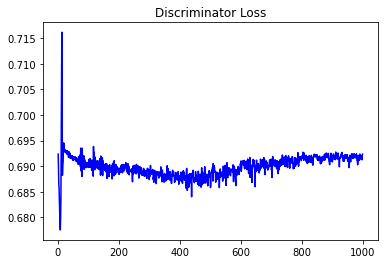

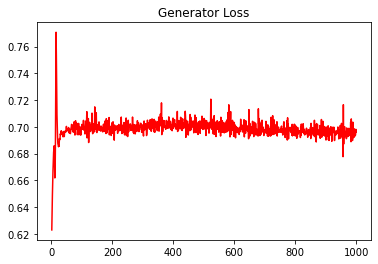

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09622645576899565


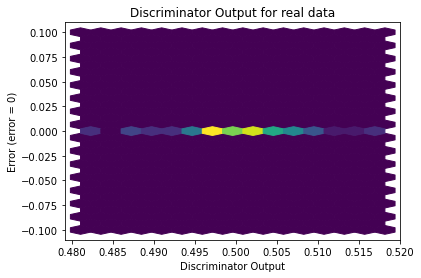

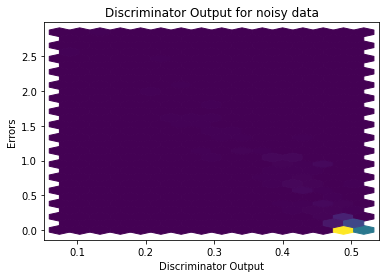

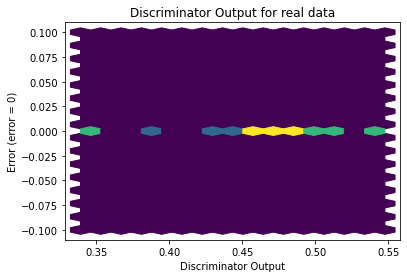

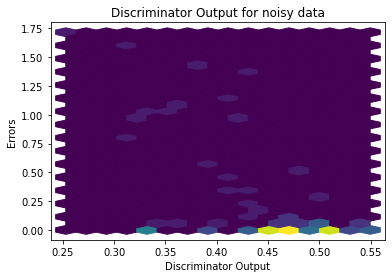

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


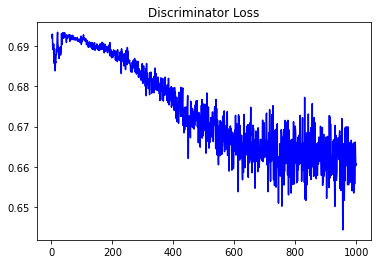

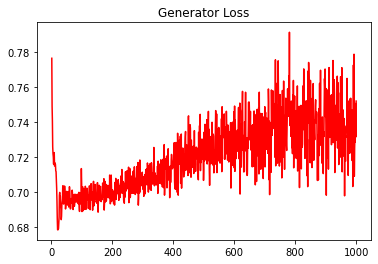

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15111774016809


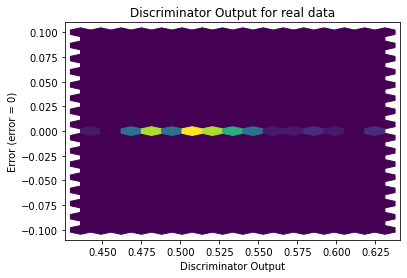

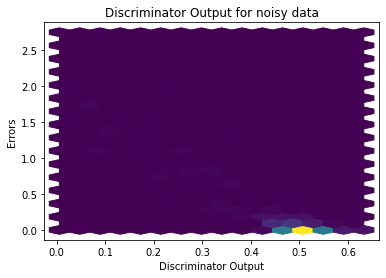

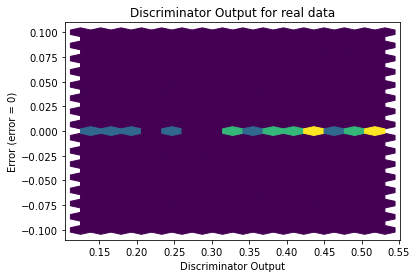

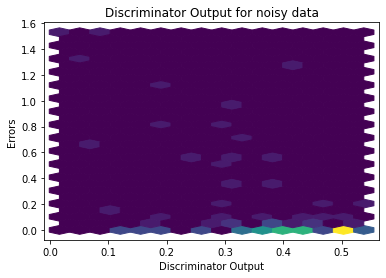

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1720]], requires_grad=True)
